# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [14]:
hum_temp = pd.read_csv('data/human_body_temperature.csv')

In [15]:
#Question1

hum_temp.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [16]:
hum_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


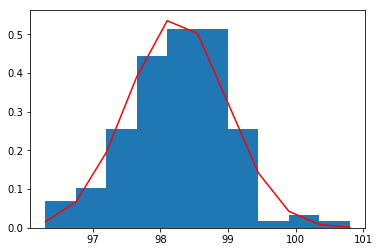

In [17]:
n, bins, patches =plt.hist(hum_temp.temperature, 10, normed=1)
temp_mean = np.mean(hum_temp.temperature)
sd = np.std(hum_temp.temperature)
plt.plot(bins, mlab.normpdf(bins, temp_mean, sd),color='r')


normal test returns a 2-tuple of the chi-squared statistic, and the associated p-value. 
Given the null hypothesis that x came from a normal distribution, 
the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen.

In [18]:
pvSl=0.05
x=hum_temp.temperature
stats.normaltest(x)


NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [19]:
if stats.normaltest(x).pvalue >= pvSl:
    print ("Test distribution is normal")  
else:
    print("Test distribution is not normal")


Test distribution is normal


As the p-value is 0.25 we can not reject the null hypothesis (the distribution is normal). 
Then we conclude that the body temperature is normal distributed.

Question2
Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.


Independent Samples Test
● “Randomization”: Each sample should
represent a random sample from the population, or at least follow the population distribution.
● “10% Rule”: The sample size must not be bigger than 10% of the entire population.
Large Enough Sample Size
● Sample size n should be large enough so that
np≥10 and nq≥10


In [20]:
if (((len(hum_temp.temperature))*  (stats.normaltest(x).pvalue)>=10)&((len(hum_temp.temperature))*  (1-(stats.normaltest(x).pvalue))>=10)):
    print ("Sample size n is large enough")  
else:
    print("Sample size n is not be large enough")

Sample size n is large enough


Question3:Is the true population mean really 98.6 degrees F?

In here our null hypothesis is that mean is equal to 98.6 while the alternative says the contrary:
H0: population mean = 98.6
HL: population mean < 96.8
n>30 so we use z test

In [21]:
n=len(hum_temp.temperature)
nsquareroot=n**0.5
# Standard deviaton of the sampling distribution
SE=(sd/nsquareroot)
SE

0.06405661469519336

In [22]:
#Z-test
#population mean mu
mu=98.6
#sample mean
temp_mean
#population standard devision SE
z=round(float((temp_mean-mu)/SE),3)
z

-5.476

In [23]:
p_value = stats.norm.sf(abs(z))*2
p_value

4.3504768662758022e-08

p-value <5% then we reject H0 :the population mean is most likely not 98.6 F

Question4:At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [24]:
max_CI=temp_mean-(z*SE)
min_CI=temp_mean+(z*SE)
print (min_CI,max_CI)

97.8984567471599 98.60000479130166


At temperatures below 97.90 and above 98.60 (with a 95% of CL)

Question5:Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [25]:
# Calculating difference in means between Females and Males, identifying z-score (from z-table), calculate confidence interval
sd_M=0.698756
sd_F=0.743488
n=65 # n_M = n_F
x_M=98.104615
x_F=98.393846
SE_FM= round((((sd_M**2)+(sd_F**2))/n)**0.5,2)
#SE
x_diff=round(x_M-x_F,2)
#x_diff


 Temperature difference hypothesis testing
 H0: there is no difference in temperatures between Females and Males ==>> x_diff = 0
 H1: there is a difference in temperatures between Females and Males ==>> x_diff != 0


In [26]:
Z= round(((x_diff - 0)/SE_FM),2)
#Z
Z

-2.23

In [27]:
CI_min= round(x_diff+(Z*SE_FM),2)
CI_max= round(x_diff-(Z*SE_FM),2)
print (CI_max,CI_min)

-0.0 -0.58


In [28]:
#p-value:
p_value = stats.norm.sf(abs(Z))*2
p_value

0.025747442877204027

we can reject the null hypathesis as p-value is 2.5%, indicating that there is a 
significant difference between males and females in normal temperature.